In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [2]:
block_size=8
batch_size=4
max_iter=10000
learning_rate=3e-4

In [3]:
device='cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cpu


In [4]:
with open('wizard_of_oz.txt','r',encoding='utf-8') as f:
    text=f.read()

In [5]:
char=sorted(set(text))
print(' the length of char is {}'.format(len(char)))
print(char)
vocab_size=len(char)

 the length of char is 80
['\n', ' ', '!', '"', '&', "'", '(', ')', '*', ',', '-', '.', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '[', ']', '_', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [6]:
string_to_int={ch:i for i, ch in enumerate(char)}
int_to_string={i:ch for i, ch in enumerate(char)}
encode=lambda s:[string_to_int[c] for c in s]
decode=lambda s:"".join([int_to_string[c] for c in s])

In [7]:
data = torch.tensor(encode(text), dtype=torch.long)

In [8]:
data[:10]

tensor([ 1,  1, 28, 39, 42, 39, 44, 32, 49,  1])

# splitting data for training and validating

In [9]:
n=int(len(text)*0.8)
train_data=data[:n]
val_data=data[n:]

In [10]:

x=train_data[:block_size]
y=train_data[1:block_size+1]
for t in range(block_size):
    context=x[:t+1]
    target=y[t]
    print("when input is ",context,'target is ',target)

when input is  tensor([1]) target is  tensor(1)
when input is  tensor([1, 1]) target is  tensor(28)
when input is  tensor([ 1,  1, 28]) target is  tensor(39)
when input is  tensor([ 1,  1, 28, 39]) target is  tensor(42)
when input is  tensor([ 1,  1, 28, 39, 42]) target is  tensor(39)
when input is  tensor([ 1,  1, 28, 39, 42, 39]) target is  tensor(44)
when input is  tensor([ 1,  1, 28, 39, 42, 39, 44]) target is  tensor(32)
when input is  tensor([ 1,  1, 28, 39, 42, 39, 44, 32]) target is  tensor(49)


In [11]:
#softmax
tensor1=torch.Tensor([1,2,3,4,5])
softmax_tensor=F.softmax(tensor1,dim=0)

print(softmax_tensor)

tensor([0.0117, 0.0317, 0.0861, 0.2341, 0.6364])


In [12]:
#initializing an embedding layer
vocal_size=1000
embedding_layer=100
#Creating embedding layer
embedding=nn.Embedding(vocal_size,embedding_layer)
#initialising input
input_indice=torch.LongTensor([1,5,3,2])
#Applying the embedding layer
embedding_output=embedding(input_indice)
print(embedding_output.shape)

torch.Size([4, 100])


In [13]:
#Get batch function
def get_batch(split):
    data=train_data if split=='train' else val_data
    ix=torch.randint(len(data)-block_size,(batch_size,))
    #print(ix)
    x=torch.stack([data[i:i+block_size] for i in ix])
    y=torch.stack([data[i+1:i+block_size+1] for i in ix])
    return x, y


In [14]:
x, y=get_batch('train')
print(x)
print(y)

tensor([[58,  1, 73, 61, 54, 73,  1, 54],
        [73, 68,  1, 74, 67, 61, 54, 71],
        [58, 72, 73, 58, 57,  1, 54, 67],
        [54, 72,  1, 55, 54, 71, 58,  1]])
tensor([[ 1, 73, 61, 54, 73,  1, 54, 65],
        [68,  1, 74, 67, 61, 54, 71, 67],
        [72, 73, 58, 57,  1, 54, 67, 57],
        [72,  1, 55, 54, 71, 58,  1, 72]])


# Class

In [15]:
class BigramLanguageModel(nn.Module):
    def __init__(self,vocab_size):
        super().__init__()
        self.token_embedding_table=nn.Embedding(vocab_size,vocab_size)
    
    def forward(self,index,target=None):
        logit=self.token_embedding_table(index)
        if target==None:
            loss=None
        else:
         #geting shape of logits
         B, T, C=logit.shape
         logit=logit.view(B*T,C)
         target=target.view(B*T)
         loss=F.cross_entropy(logit,target)
        
        return logit, loss
    
    def generate(self,index,max_new_tokens):
        #index is (B,T) array of indices in the current content
        for _ in range(max_new_tokens):
            #get prediction
            logit, loss=self.forward(index)
            #focus only on last step
            logit=logit[:,-1,:] #becomes (B,C)
            probs=F.softmax(logit,dim=-1) #(B,C)
            index_next=torch.multinomial(probs,num_samples=1)
            #append sampled index to the running sequence
            index=torch.cat((index,index_next),dim=1)
        return index


In [16]:
model=BigramLanguageModel(vocab_size)

In [17]:
context=torch.zeros((1,1),dtype=torch.long,)

In [18]:
len(model.generate(
    context,
    max_new_tokens=500)[0].tolist())

501

In [19]:
generated_char=decode(model.generate(
    context,
    max_new_tokens=500)[0].tolist()
)
print(generated_char)



_I8 V9tFyYs8]'QAYjMcA*"tj.Su8_?4s0pQm2k2_&t,H3a kx'ZCba;'W,2n'O";AYy1.8mGQSd
qpiJ:gESEB"3cEvh.FHpUfb&i8,V8U9e*Ixn*o,bC:]7Tzu4
15"6J'Nn;YwNX-i'fpqe*pkm"73k?L;Y9Y9D"THK_QY;isHp-kWm&B,fbJl,bY3ZXY)?1h78Y0c'r-N0gSR5TYd.lKS'PLpQcs; 8p[DeVIxyvtr]B[piED?00f-FJbyd"El&IBPR3j9!n4'4
IUKCiO6n.x,Mf3?L:V Rcv;?9lWgF(b0nB' Pq6-k'2Nzk18QD7s&]In2ACJ[?MP1i9sTjkYLea7"oT5tj l &*d" VMXOQZzseX0dkxHmh.VwnEZGW:P-g!yCOrhJWt.G*8
]i7Na*pR*!abHm;hl0OyCb?PXM]ZDek1Ix7V)k9AeO"8pPY,3hqpQrJF9']hPL&t.CRfb4-s8zcG ),yNXhVwZ(4K3S.Q3-


# Optimiser

In [20]:
losst=[]

In [21]:

optimizer=torch.optim.AdamW(model.parameters(),lr=learning_rate)

for iter in range(max_iter*20):
    xb, yb=get_batch('train')

    #Evluate loss

    logit, loss=model.forward(xb,yb)
    losst.append(loss)
    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()
print(loss)

tensor(2.3389, grad_fn=<NllLossBackward0>)


In [22]:
import seaborn as sns

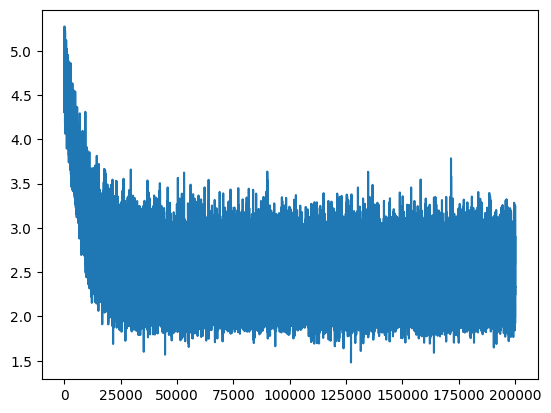

In [23]:
plt.plot([x.item() for x in losst])

In [24]:
input_test=torch.rand((4,6,10))
B,T,C=input_test.shape
print(input_test)
input_test=input_test.view(B*T,C)

print('after \n',input_test)


tensor([[[0.2438, 0.8844, 0.8073, 0.2138, 0.6177, 0.8998, 0.9042, 0.4286,
          0.0878, 0.2178],
         [0.4840, 0.5191, 0.9614, 0.9682, 0.8907, 0.9514, 0.4547, 0.7993,
          0.3290, 0.4773],
         [0.2590, 0.9308, 0.4121, 0.7026, 0.3312, 0.9679, 0.4455, 0.8683,
          0.4368, 0.2391],
         [0.4447, 0.1196, 0.6646, 0.7479, 0.4412, 0.6668, 0.4926, 0.2575,
          0.9029, 0.6151],
         [0.7356, 0.7238, 0.6110, 0.2009, 0.5296, 0.8061, 0.8813, 0.8309,
          0.6918, 0.4380],
         [0.3555, 0.8936, 0.3937, 0.1513, 0.1411, 0.2640, 0.7022, 0.7592,
          0.4205, 0.5610]],

        [[0.2591, 0.8347, 0.1585, 0.1912, 0.0382, 0.7871, 0.9167, 0.6851,
          0.3779, 0.4414],
         [0.6335, 0.4701, 0.9473, 0.9974, 0.2205, 0.0387, 0.6556, 0.6486,
          0.9521, 0.8144],
         [0.6049, 0.0394, 0.8076, 0.3920, 0.5939, 0.7497, 0.4142, 0.7449,
          0.9474, 0.5794],
         [0.5884, 0.6529, 0.4686, 0.9015, 0.3369, 0.9544, 0.4328, 0.7844,
          0.578